### Initialization

In [9]:
# import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [10]:
# constants
R = 0.99
d = 1.51 *0.01 # m
Δd = 0.01 *0.01 # m
F = 30.0 *0.01 # m
ΔF = 0.5 *0.01 # m
c = 3.00 *10**8 # m/s
e = 1.602 * 10**-19 # C
m_e = 9.109 * 10**-31 # kg
h = 6.626 * 10**-34 # Js
# μ_B = e * h / (4 * np.pi * m_e) # J/T
# Mit der Formel bekommst du einen Rundungsfehler
μ_B = 9.274 * 10**-24 # J/T
λ_Cd = 643.85 *10**-9 # m
λ_Zn = 636.24 *10**-9 # m

In [11]:
# measured data

path = 'Data/'

#1
input = path+'1.txt'
data_1 = [[],[]]
count = 0
for line in open(input):
    if count < 26:
        data_1[0].append(np.float(line.split()[1]))
        count = count + 1
    else:
        data_1[1].append(np.float(line.split()[1]))

# data_1[0] = hoch, data_1[1] = runter
data_1 = np.array([data_1[0],data_1[1][::-1]]) * 0.001 # T
Δdata_1 = 3 *0.001 # T
I_1 = 2*np.array([range(26),range(26)]) # A
ΔI_1 = 1 # A

#4
data_4 = [[],[]]
rings_4 = [[],[]]

# Zn
input = path+'4_Zn.txt'
for line in open(input):
    rings_4[0].append(np.float(line.split()[0]))
    data_4[0].append(np.float(line.split()[1]))

# Cd
input = path+'4_Cd.txt'
for line in open(input):
    rings_4[1].append(np.float(line.split()[0]))
    data_4[1].append(np.float(line.split()[1]))

# data_4[0] = Zn, data_4[1] = Cd
data_4 = [np.array(data_4[0]) *0.001,np.array(data_4[1]) *0.001] # m
Δdata_4 = 0.1 *0.001 # m
rings_4 = np.array(rings_4)

#6
I_6 = np.array([9,19,32]) # A
ΔI_6 = 1 # A
split_6 = ['1/4','1/2','3/4']

#7
I_7 = I_6[0] # A
ΔI_7 = ΔI_6 # A
data_7 = [[],[]]
rings_7 = [[],[]]

input = path+'7.txt'
count = 0
for line in open(input):
    if (0 == count or 7 == count):
        None
    else:
        if count < 7:
            rings_7[0].append(np.float(line.split()[0]))
            data_7[0].append(np.float(line.split()[1]))
        else:
            rings_7[1].append(np.float(line.split()[0]))
            data_7[1].append(np.float(line.split()[1]))
    count += 1
    
# data_7[0] = polarisation up, data_7[1] = polarisation right
data_7 = np.array(data_7) *0.001 # m
Δdata_7 = 0.1 *0.001 # m
rings_7 = np.array(rings_7)

#8
I_8 = 5 # A
ΔI_8 = 1 # A

In [12]:
# theoretical functions
f_lin = lambda x,a,b: a+b*x

### Task 1

In [94]:
# calculations

# Achtung opt_i kommen später
def m(I):
    I = np.array(I)
    arr = np.array([])
    for i in I:
        if i < 23:
            arr = np.append(arr,opt_2[0])
        elif i < 36:
            arr = np.append(arr,opt_3[0])
        else:
            arr = np.append(arr,opt_4[0])
    return arr * 0.001

def B(I):
    I = np.array(I)
    arr = np.array([])
    for i in I:
        arr = np.append(arr,(data_1[0][np.floor(i/2)] + data_1[0][np.ceil(i/2)]) / 2)
    return arr
        
def ΔB(I):
    return np.sqrt((Δdata_1)**2 + 2*(m(I) * ΔI_1)**2)

# Fehlerrechnung mit Hilfe von Polynomfit für den Weg hoch
#fun = lambda x,*a: sum([a[i]*x**i for i in range(len(a))])
#opt_1,cov_1 =curve_fit(fun,I_1[0],data_1[0],p0=(1,1,1,1),sigma=Δdata_1,absolute_sigma=True)
#Δopt_1 = np.sqrt(np.diag(cov_1))
#def B(I):
#    return fun(I,*opt_1)


#def ΔB(I):
#    
#    sum1 = 0
#    i = 0
#    for a in Δopt_1:
#        sum1 += (a * I**i)**2
#        i += 1
#    sum2 = 0
#    i = 0
#    for a in opt_1:
#        if i > 0:
#            sum2 += i * a * I**(i-1)
#        i += 1
#    return np.sqrt(sum1 + 27/26* (ΔI_1 * sum2 )**2)

In [14]:
m([1,4,6,8,23,35,26,49])

array([ 0.01921154,  0.01921154,  0.01921154,  0.01921154,  0.01032857,
        0.01032857,  0.01032857,  0.00560119])

In [15]:
#B_2 = []
#ΔB_2 = []
#for i in range(51):
#    B_2.append(B(i))
#    ΔB_2.append(ΔB(i))
#plt.plot(B_2)
#plt.plot(ΔB_2)
#plt.plot(range(0,51,2),data_1[0])
#print(opt_1)

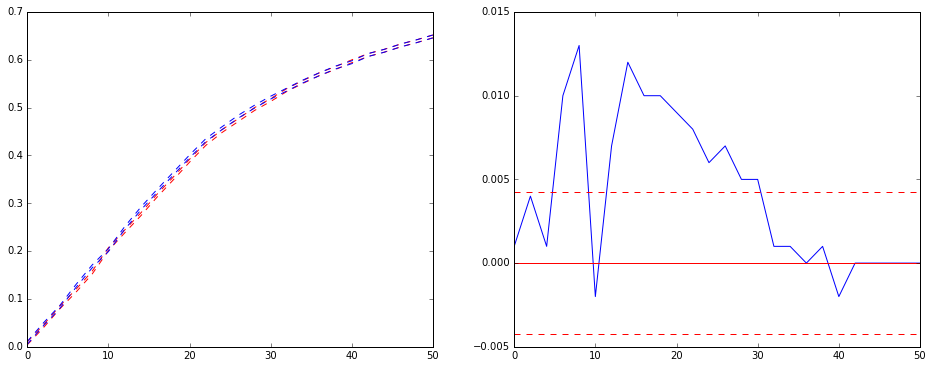

In [16]:
# plots
fig,ax = plt.subplots(1,2,figsize=(16,6))

#ax[0].errorbar(I_1[0],data_1[0],xerr=ΔI_1,yerr=Δdata_1,fmt='.',c='r')
ax[0].plot(I_1[0],data_1[0]+Δdata_1,'--r')
ax[0].plot(I_1[0],data_1[0]-Δdata_1,'--r')
#ax[0].errorbar(I_1[1],data_1[1],xerr=ΔI_1,yerr=Δdata_1,fmt='.',c='b')
ax[0].plot(I_1[1],data_1[1]+Δdata_1,'--b')
ax[0].plot(I_1[1],data_1[1]-Δdata_1,'--b')

ax[1].plot(I_1[0],data_1[1]-data_1[0])
ax[1].axhline(0,c='r')
ax[1].plot([0,50],2*[np.sqrt(2)*Δdata_1],'--r')
ax[1].plot([0,50],2*[-np.sqrt(2)*Δdata_1],'--r')

###### # conclusion
Hysterese ist angedeutet, allerdings sehr schwach ausgeprägt. Ab sofort wird die erste Datenreihe verwendet, da vor jeder messung der strom minimal ist.

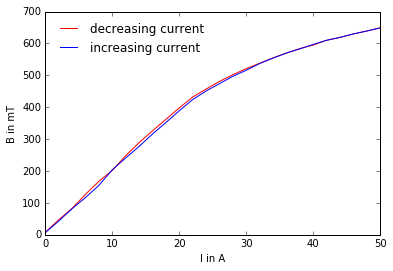

In [17]:
# plot
fig,ax = plt.subplots(figsize=(6,4))

ax.plot(I_1[1],data_1[1]*1000,label='decreasing current',c='r')
ax.plot(I_1[0],data_1[0]*1000,label='increasing current',c='b')
ax.legend(loc=0,frameon=False)
ax.set_xlabel('I in A')
ax.set_ylabel('B in mT')
#fig.savefig('cal_1.pdf')

C:\Users\Niklas\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(0, 700)

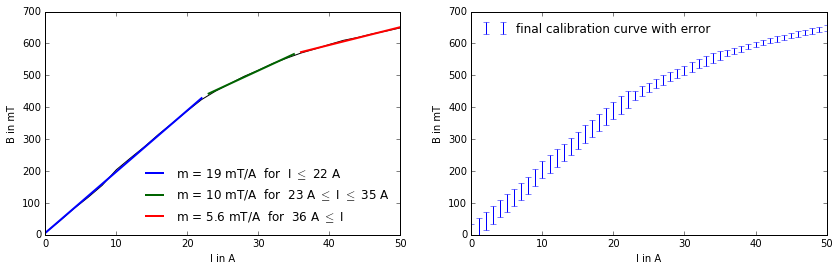

In [18]:
# plot
fig,ax = plt.subplots(1,2,figsize=(14,4))

a1 = 12
a2 = 18

lin = lambda x,m,b: m*np.array(x) + b
opt_2,cov_2 = curve_fit(lin,I_1[0][:a1],data_1[0][:a1]*1000)
opt_3,cov_3 = curve_fit(lin,I_1[0][a1:a2],data_1[0][a1:a2]*1000)
opt_4,cov_4 = curve_fit(lin,I_1[0][a2:],data_1[0][a2:]*1000)

#ax.scatter(I_1[0][[a1-1,a2-1]],data_1[0][[a1-1,a2-1]]*1000)
ax[0].plot(I_1[0],data_1[0]*1000,c='k')
ax[0].plot(range(I_1[0][a1]-1),lin(range(I_1[0][a1]-1),*opt_2),lw=2,label='m = %0.f mT/A  for  I $\leq$ %d A'%(opt_2[0],I_1[0][a1-1]))
ax[0].plot(range(I_1[0][a1]-1,I_1[0][a2]),lin(range(I_1[0][a1]-1,I_1[0][a2]),*opt_3),lw=2,c='darkgreen',label='m = %0.f mT/A  for  %d A $\leq$ I $\leq$ %d A'%(opt_3[0],I_1[0][a1]-1,I_1[0][a2-1]+1))
ax[0].plot(range(I_1[0][a2],I_1[0][-1]+1),lin(range(I_1[0][a2],I_1[0][-1]+1),*opt_4),c='r',lw=2,label='m = %0.1f mT/A  for  %d A $\leq$ I'%(opt_4[0],I_1[0][a2]))

ax[0].legend(loc=0,frameon=False)
ax[0].set_xlabel('I in A')
ax[0].set_ylabel('B in mT')

ax[1].errorbar(range(51),1000*B(range(51)),yerr=1000*ΔB(range(51)),label='final calibration curve with error',fmt='None',c='b')
ax[1].legend(loc=0,frameon=False)
ax[1].set_xlabel('I in A')
ax[1].set_ylabel('B in mT')
ax[1].set_ylim(0,700)

#fig.savefig('cal_2.pdf')

C:\Users\Niklas\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<Container object of 3 artists>

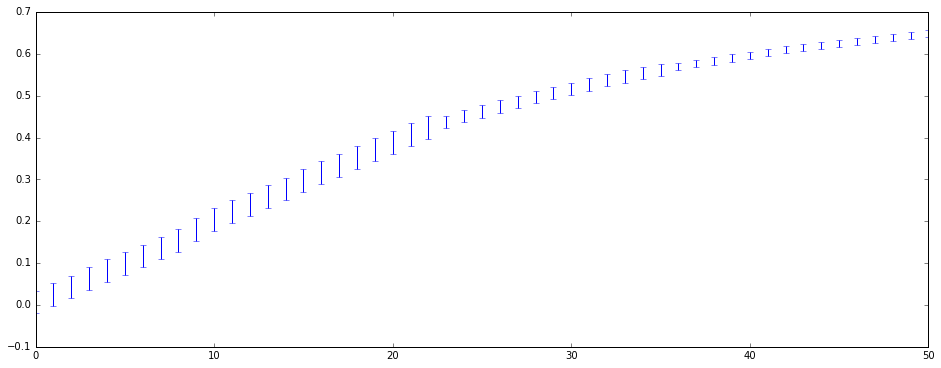

In [19]:
fig,ax = plt.subplots(1,1,figsize=(16,6))

ax.errorbar(range(51),B(range(51)),yerr=ΔB(range(51)),fmt='None',c='b')

[  6.39506945e-03   1.72433336e-02   3.76274460e-04  -1.78058756e-05
   1.70898078e-07]
[  2.37582873e-03   6.86087054e-04   5.74378880e-05   1.74249788e-06
   1.72807517e-08]
[  7.37149446e-03   1.83232573e-02   3.40181682e-04  -1.79529147e-05
   1.79649549e-07]
[  2.37582853e-03   6.86086891e-04   5.74378716e-05   1.74249731e-06
   1.72807455e-08]


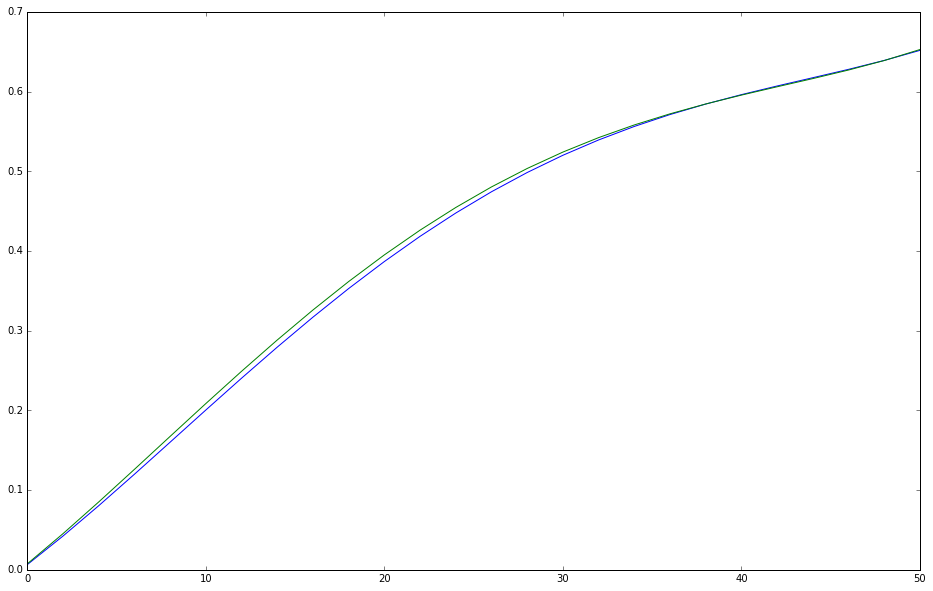

In [20]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
fun = lambda x,*a: sum([a[i]*x**i for i in range(len(a))])
opt,cov =curve_fit(fun,I_1[0],data_1[0],p0=(1,1,1,1,1),sigma=Δdata_1,absolute_sigma=True)
#ax[0].errorbar(I_1[0],data_1[0],xerr=ΔI_1,yerr=Δdata_1,fmt='.',c='r')
#ax.plot(I_1[0],data_1[0],'-b')
ax.plot(I_1[0],fun(I_1[0],*opt))
print(opt,np.sqrt(np.diag(cov)),sep='\n')
#ax.plot(I_1[0],data_1[0]-Δdata_1,'--r')
opt1,cov1 =curve_fit(fun,I_1[1],data_1[1],p0=(1,1,1,1,1),sigma=Δdata_1,absolute_sigma=True)
#ax[0].errorbar(I_1[0],data_1[0],xerr=ΔI_1,yerr=Δdata_1,fmt='.',c='r')
#ax.plot(I_1[1],data_1[1],'-r')
ax.plot(I_1[1],fun(I_1[1],*opt1))
print(opt1,np.sqrt(np.diag(cov1)),sep='\n')

### Task 2

In [21]:
# calculations
None

In [22]:
# plots
None

###### # conclusion
None

### Task 3

In [23]:
# calculations
None

In [24]:
# plots
None

###### # conclusion
None

### Task 4

In [25]:
# calculations

o_4 = [[],[]]
Δo_4 = [[],[]]
r_4 = [[],[]]
Δr_4 = [[],[]]
b_4 = [[],[]]
Δb_4 = [[],[]]

# Zn
# Bestimmung des Nullpunkts
o_4[0] = (sum(data_4[0][0:3]+data_4[0][6:3:-1])/2+data_4[0][3])/4
Δo_4[0] = np.sqrt(6*(Δdata_4/8)**2 + (Δdata_4/4)**2)
r_4[0] = o_4[0] - data_4[0][4:]
Δr_4[0] = np.sqrt(Δo_4[0]**2 + Δdata_4**2)

# linear fit
opt_Zn, cov_Zn = curve_fit(f_lin, np.linspace(1,10,10), r_4[0]**2,sigma=2* r_4[0]*Δr_4[0],absolute_sigma=True)
b_4[0] = opt_Zn[1]
Δb_4[0] = np.sqrt(np.diag(cov_Zn)[1])

# Cd
# Bestimmung des Nullpunkts
o_4[1] = (sum(data_4[1][0:3]+data_4[1][5:2:-1])/2)/3
Δo_4[1] = np.sqrt(6*(Δdata_4/6)**2)
r_4[1] = o_4[1] - data_4[1][3:]
Δr_4[1] = np.sqrt(Δo_4[1]**2 + Δdata_4**2)

# linear fit
opt_Cd, cov_Cd = curve_fit(f_lin, np.linspace(1,10,10), r_4[1]**2,sigma=2* r_4[1]*Δr_4[1],absolute_sigma=True)
b_4[1] = opt_Cd[1]
Δb_4[1] = np.sqrt(np.diag(cov_Cd)[1])

In [26]:
Δb_4[0]/b_4[0]
#Δd/d
ΔF/F

0.016666666666666666

0 von Zn: 0.00104375 +- 3.95284707521e-05 
 0 von Cd: 0.001245 +- 4.08248290464e-05
wavelengths: 5.73982084269e-07 2.42527575485e-08 6.19039965485e-07 2.51695187104e-08


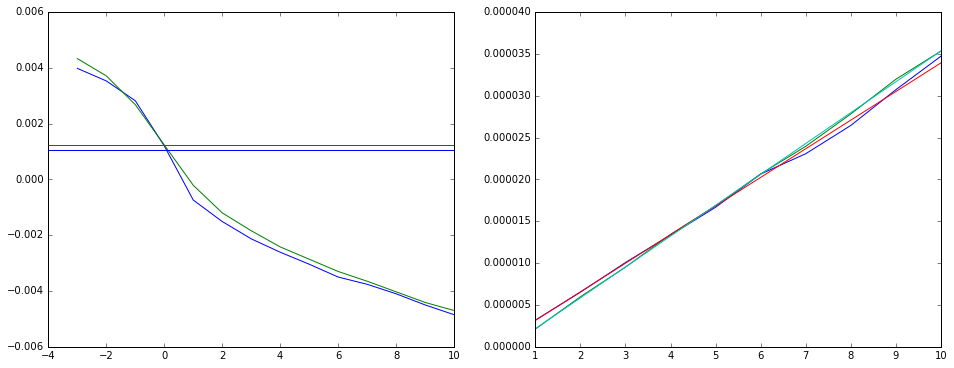

In [27]:
# plots
fig,ax = plt.subplots(1,2,figsize=(16,6))

ax[0].plot(rings_4[0],data_4[0],'-b')
ax[0].plot(rings_4[1],data_4[1],'-g')
ax[0].axhline(o_4[0],c='b')
ax[0].axhline(o_4[1],c='g')
ax[1].plot(range(1,11),r_4[0]**2)
ax[1].plot(range(1,11),r_4[1]**2)

x = np.linspace(1,10,50)
ax[1].plot(x,f_lin(x,*opt_Zn))
ax[1].plot(x,f_lin(x,*opt_Cd))
λ_Zn4 = b_4[0]*d/F**2
Δλ_Zn4 = λ_Zn4 * np.sqrt((Δb_4[0]/b_4[0])**2 + (Δd/d)**2 + (2*ΔF/F)**2)
λ_Cd4 = b_4[1]*d/F**2
Δλ_Cd4 = λ_Cd4 * np.sqrt((Δb_4[1]/b_4[1])**2 + (Δd/d)**2 + (2*ΔF/F)**2)
print('0 von Zn:',o_4[0],'+-',Δo_4[0],'\n','0 von Cd:',o_4[1],'+-',Δo_4[1])
print('wavelengths:',λ_Zn4,Δλ_Zn4,λ_Cd4,Δλ_Cd4)

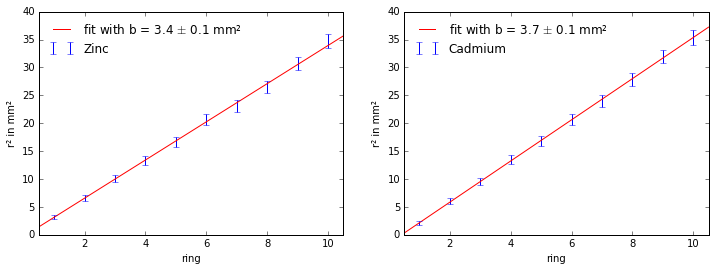

In [68]:
# plot
fig,ax = plt.subplots(1,2,figsize=(12,4))

rg2 =np.linspace(0.5,10.5,5)
rg =np.array(range(1,11))
ax[0].plot(rg2,f_lin(rg2,*opt_Zn)*1000**2,c='r',label='fit with b = %0.1f $\pm$ %0.1f mm²'%(b_4[0]*10**6,Δb_4[0]*10**6))
ax[0].errorbar(rg,(r_4[0]*1000)**2,yerr=2* r_4[0]*Δr_4[0]*10**6,fmt='None',label='Zinc',c='b')
ax[1].plot(rg2,f_lin(rg2,*opt_Cd)*1000**2,c='r',label='fit with b = %0.1f $\pm$ %0.1f mm²'%(b_4[1]*10**6,Δb_4[1]*10**6))
ax[1].errorbar(rg,(r_4[1]*1000)**2,yerr=2* r_4[1]*Δr_4[1]*10**6,fmt='None',label='Cadmium',c='b')
ax[0].legend(loc=0,frameon=False)
ax[0].set_xlabel('ring')
ax[0].set_ylabel('r² in mm²')
ax[0].set_xlim(0.5,10.5)
ax[1].set_xlim(0.5,10.5)
ax[1].legend(loc=0,frameon=False)
ax[1].set_xlabel('ring')
ax[1].set_ylabel('r² in mm²')
#fig.savefig('t4_fit.pdf')

###### # conclusion
Fehler müssen noch ordentlich gemacht werden, scheinen aber recht groß zu sein, dementsprechend die Werte vermutlich noch akzeptabel.

### Task 5

In [29]:
# calculations
None

In [30]:
# plots
None

###### # conclusion
None

### Task 6

In [31]:
# calculations

# Rechne I in B um über Mittelung der zwei umliegenden Werte, falls nötig
# verwende aufsteigenden Teil der Hysterese
B_6 = B(I_6)
ΔB_6 = ΔB(I_6)

C:\Users\Niklas\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [32]:
# plots
print(I_6,ΔI_6,'\n',B_6,'\n',ΔB_6)

[ 9 19 32] 1 
 [ 0.1795  0.3705  0.537 ] 
 [ 0.02733435  0.02733435  0.0149117 ]


###### # conclusion
Eine Tabelle müsste gemacht werden.

### Task 7

In [33]:
# calculations


In [34]:
# plots
print(data_7)

[[ 0.00112 -0.00072 -0.00159 -0.00222 -0.00272 -0.00329]
 [ 0.00241 -0.00025 -0.00119 -0.00185 -0.0025  -0.00303]]


###### # conclusion


### Task 8

In [35]:
# calculations

# theoretical resolving capacity
rc_t = np.pi * d / λ_Cd *2* np.sqrt(R)/(1-R)
Δrc_t = rc_t * Δd/d

# measured resolving capacity
# Hysterese aufwärts
B_8 = B([I_8])
ΔB_8 = ΔB([I_8])
dE = μ_B * B_8
ΔdE = μ_B * ΔB_8
dλ_p = h * c /(h * c / λ_Cd - dE)
dλ_m = h * c /(h * c / λ_Cd + dE)
rc_m = λ_Cd / (dλ_p-dλ_m)
Δrc_m = rc_m * np.sqrt((dλ_p**2 * ΔdE/(h*c) / (dλ_p-dλ_m))**2 + (dλ_m**2 * ΔdE/(h*c) / (dλ_p-dλ_m))**2)

print(rc_t,Δrc_t,'\n',rc_m,'+-',Δrc_m)

14661881.7627 97098.5547201 
 [ 167289.16685838] +- [ 32496.63648467]


C:\Users\Niklas\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [36]:
# plots
print(I_8,ΔI_8,'\n',B_8,ΔB_8)

5 1 
 [ 0.0995] [ 0.02733435]


###### # conclusion
Vielleicht ist irgendwo ne Zehnerpotenz falsch...

In [37]:
print(data_7)

[[ 0.00112 -0.00072 -0.00159 -0.00222 -0.00272 -0.00329]
 [ 0.00241 -0.00025 -0.00119 -0.00185 -0.0025  -0.00303]]


### Task 9

In [38]:
# calculations

# calculations

o_7 = [[],[]]
Δo_7 = [[],[]]
r_7 = [[],[]]
Δr_7 = [[],[]]
b_7 = [[],[]]
Δb_7 = [[],[]]

# sigma plus
# Bestimmung des Nullpunkts
o_7[0] = data_7[0][0]
Δo_7[0] = Δdata_7
r_7[0] = o_7[0] - data_7[0][1:]
Δr_7[0] = np.sqrt(Δo_7[0]**2 + Δdata_7**2)

# linear fit
opt_p, cov_p = curve_fit(f_lin, np.linspace(1,5,5), r_7[0]**2,sigma=2* r_7[0]*Δr_7[0],absolute_sigma=True)
b_7[0] = opt_p[1]
Δb_7[0] = np.sqrt(np.diag(cov_p)[1])

# sigma minus
# Bestimmung des Nullpunkts
o_7[1] = (data_7[1][0]+data_7[1][1])/2
Δo_7[1] = 0.5**0.5 * Δdata_7
r_7[1] = o_7[1] - data_7[1][1:]
Δr_7[1] = np.sqrt(Δo_7[1]**2 + Δdata_7**2)

# linear fit
opt_m, cov_m = curve_fit(f_lin, np.linspace(1,5,5), r_7[1]**2,sigma=2* r_7[1]*Δr_7[1],absolute_sigma=True)
b_7[1] = opt_m[1]
Δb_7[1] = np.sqrt(np.diag(cov_m)[1])

In [69]:
print(o_7,Δo_7)

[0.0011200000000000001, 0.0010800000000000002] [0.0001, 7.071067811865475e-05]


(0.5, 5.5)

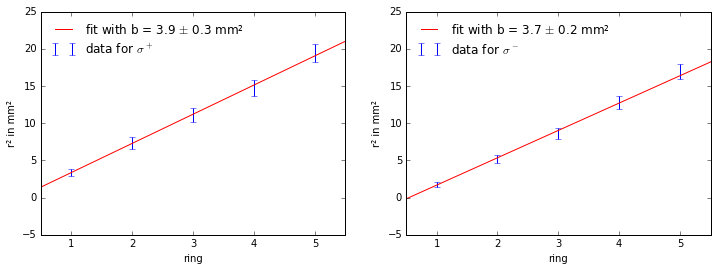

In [76]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
rg2 = np.linspace(0,6,5) 
rg =np.array(range(1,6))
ax[0].plot(rg2,f_lin(rg2,*opt_p)*1000**2,c='r',label='fit with b = %0.1f $\pm$ %0.1f mm²'%(b_7[0]*10**6,Δb_7[0]*10**6))
ax[0].errorbar(rg,(r_7[0]*1000)**2,yerr=2* r_7[0]*Δr_7[0]*10**6,fmt='None',label='data for $\sigma ^+$',c='b')
ax[1].plot(rg2,f_lin(rg2,*opt_m)*1000**2,c='r',label='fit with b = %0.1f $\pm$ %0.1f mm²'%(b_7[1]*10**6,Δb_7[1]*10**6))
ax[1].errorbar(rg,(r_7[1]*1000)**2,yerr=2* r_7[1]*Δr_7[1]*10**6,fmt='None',label='data for $\sigma^-$',c='b')
ax[0].legend(loc=0,frameon=False)
ax[0].set_xlabel('ring')
ax[0].set_ylabel('r² in mm²')
ax[1].legend(loc=2,frameon=False)
ax[1].set_xlabel('ring')
ax[1].set_ylabel('r² in mm²')
ax[0].set_xlim(.5,5.5)
ax[1].set_xlim(.5,5.5)
#fig.savefig('t7_fit.pdf')

0 von s+: 0.00112 +- 0.0001 
 0 von s-: 0.00108 +- 7.071067811865475e-05
wavelengths: 6.57626927337e-07 5.0318629853e-08 6.17250942942e-07 3.94448714777e-08


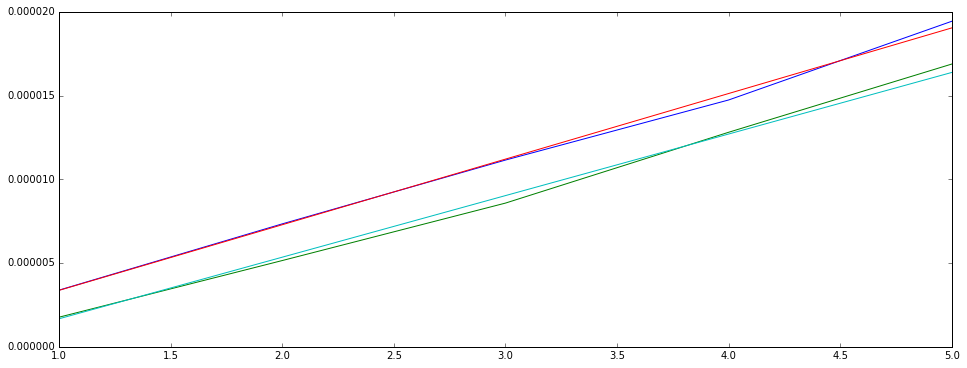

In [40]:
# plots

# plots
fig,ax = plt.subplots(1,1,figsize=(16,6))

ax.plot(range(1,6),r_7[0]**2)
ax.plot(range(1,6),r_7[1]**2)

x = np.linspace(1,5,50)
ax.plot(x,f_lin(x,*opt_p))
ax.plot(x,f_lin(x,*opt_m))
λ_p7 = b_7[0]*d/F**2
Δλ_p7 = λ_p7 * np.sqrt((Δb_7[0]/b_7[0])**2 + (Δd/d)**2 + (2*ΔF/F)**2)
λ_m7 = b_7[1]*d/F**2
Δλ_m7 = λ_m7 * np.sqrt((Δb_7[1]/b_7[1])**2 + (Δd/d)**2 + (2*ΔF/F)**2)
print('0 von s+:',o_7[0],'+-',Δo_7[0],'\n','0 von s-:',o_7[1],'+-',Δo_7[1])
print('wavelengths:',λ_p7,Δλ_p7,λ_m7,Δλ_m7)

In [41]:
B_7 = B([I_7])
ΔB_7 = B([ΔI_7])
E_p7 = h*c/λ_p7
ΔE_p7 = E_p7 * Δλ_p7/λ_p7
E_m7 = h*c/λ_m7
ΔE_m7 = E_m7 * Δλ_m7/λ_m7
μB_7 = (E_p7 - E_m7) / (2* B_7)
ΔμB_7 = np.sqrt((ΔE_p7**2 + ΔE_m7**2)/(2* B_7)**2 + (μB_7 * ΔB_7/B_7)**2)
print(μB_7,ΔμB_7)

[ -5.50756983e-20] [  8.65763755e-20]


C:\Users\Niklas\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [49]:
# linear fit for difference
opt_7, cov_7 = curve_fit(f_lin, np.linspace(1,5,5), r_7[0]**2 - r_7[1]**2,sigma=np.sqrt((2* r_7[0]*Δr_7[0])**2 + (2* r_7[1]*Δr_7[1])**2),absolute_sigma=True)
b_d7 = opt_7[1]
Δb_d7 = np.sqrt(np.diag(cov_7)[1])

λ_d7 = b_d7*d/F**2
Δλ_d7 = λ_d7 * np.sqrt((Δb_d7/b_d7)**2 + (Δd/d)**2 + (2*ΔF/F)**2)

E_d7 = 2*h*c*λ_d7/λ_Cd**2
μB_7 = E_d7 / (2* B_7)
print(μB_7)
print(λ_d7)
λ_p7-λ_m7

[  1.01091811e-19]
3.7842266777e-08


4.0375984395218041e-08

In [99]:
m_9=2*d/λ_Cd
Δm_9=2*Δd/λ_Cd
print(4*np.pi*c*np.array([.25,.5,.75])/(m_9*λ_Cd*B(I_6)))
print(4*np.pi*c*np.array([.25,.5,.75])/(m_9*λ_Cd*B(I_6))*np.sqrt((Δm_9/m_9)**2+(ΔB(I_6)/B(I_6))**2))

[  1.73860023e+11   1.68463558e+11   1.74345665e+11]
[  2.65005112e+10   1.24786930e+10   4.97709955e+09]


C:\Users\Niklas\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [100]:
ΔB(I_6)/B(I_6)

C:\Users\Niklas\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([ 0.15228047,  0.07377691,  0.02776853])

###### # conclusion
